
# 

#        WEBSCRAPE EBAY PRODUCT DATA  


#### This data below show a filter category of books that contain Business Intelligence in its title 

# 

In [1]:
# Import all libraries required

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [26]:
# Specify the URL of the Ebay item

url_pattern = 'https://www.ebay.com/sch/267/i.html?_from=R40&_nkw=Business+Intelligence+&rt=nc'

In [27]:
# create an empty list to store the scraped data
product_data = []

# iterate over the page numbers
for page_num in range(1, 11):   # scrape data from page 1 to 10
    # create the url for the current page
    url = url_pattern.format(page_num=page_num)

In [28]:
#send a GET request to the URL and extract the HTML content

response = requests.get(url)
content = response.content

In [29]:
#Use Beautiful Soup to parse the HTML content

soup = BeautifulSoup(content, 'html.parser')

In [30]:
#Extract the product information needed
items = soup.find_all('div', {'class': 's-item__wrapper clearfix'})
    

for item in items:
    title = item.find('div', {'class': 's-item__title'}).text.strip()
    
    price_sold = float(item.find('span', {'class': 's-item__price'}).text.replace('$','').replace(',','').strip())
    shipping_cost = item.find('span', {'class': 's-item__shipping s-item__logisticsCost'})
    if shipping_cost:
        shipping_cost = shipping_cost.text.replace('+','').replace('$','').replace(',','').strip()
    else:
        shipping_cost = 0.0
    item_location = item.find('span', {'class': 's-item__location s-item__itemLocation'})
    if item_location:
        item_location = item_location.text.replace('from','').strip()
    else:
        item_location = ''
    item_seller = item.find('span', {'class':'s-item__seller-info'})
    if item_seller:
        item_seller = item_seller.text.strip()
    else:
        item_seller = ''
    link = item.find('a', {'class': 's-item__link'})['href']
    product_data.append([title, price_sold, shipping_cost, item_location, item_seller, link])
    
BIbooks = pd.DataFrame(product_data, columns=['Title', 'Price_sold', 'Shipping_cost', 'Item_location','Item_seller', 'Link'])
print(BIbooks.head())


                                               Title  Price_sold  \
0                                       Shop on eBay       20.00   
1  Business Intelligence : Practices, Technologie...       54.99   
2  The Artificial Intelligence Imperative: A Prac...       30.17   
3  Business Intelligence With Cold Fusion By John...       13.78   
4     Better Business Intelligence By Robert Collins       14.63   

    Shipping_cost   Item_location                      Item_seller  \
0             0.0                                                    
1  57.45 shipping   United States           vbbc2015 (11,848) 100%   
2  17.48 shipping  United Kingdom     webuybooks (1,740,389) 99.7%   
3   6.99 shipping   United States  awesomebooksusa (387,183) 98.2%   
4   5.35 shipping  United Kingdom    book_fountain (166,979) 99.2%   

                                                Link  
0  https://ebay.com/itm/123456?hash=item28caef0a3...  
1  https://www.ebay.com/itm/134303280275?epid=738...  
2  ht

In [31]:
#Display the first 2 rows of the Business Inteligence(BI) books

BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link
0,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?hash=item28caef0a3...
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...


In [32]:
#To separate the Item_seller column into two columns, one for the seller name and one for the seller rating

BIbooks[['Seller_name','Seller_feedback', 'Seller_Rating%']] = BIbooks['Item_seller'].str.split(' ', expand=True)
BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
0,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?hash=item28caef0a3...,,None,None
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...,vbbc2015,"(11,848)",100%


In [33]:
#check for null values

BIbooks.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_location      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    1
Seller_Rating%     1
dtype: int64

In [34]:
#Drop the first row column 

BIbooks = BIbooks.drop([0], axis=0) #drop the first row

BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...,vbbc2015,"(11,848)",100%
2,The Artificial Intelligence Imperative: A Prac...,30.17,17.48 shipping,United Kingdom,"webuybooks (1,740,389) 99.7%",https://www.ebay.com/itm/134435858075?epid=230...,webuybooks,"(1,740,389)",99.7%


In [35]:
#Remove the brackets from the 'Seller_feedback' column by calling the str.replace() 
BIbooks['Seller_feedback'] = BIbooks['Seller_feedback'].str.replace('[(),]', '', regex=True)


#Remove the Percentage % sign from the 'Seller_Rating%' column
BIbooks['Seller_Rating%'] = BIbooks['Seller_Rating%'].str.replace('%', '', regex=True)


#Convert the column datatype using the astype()

BIbooks['Seller_feedback'] = BIbooks['Seller_feedback'].astype(int)
BIbooks['Seller_Rating%'] = BIbooks['Seller_Rating%'].astype(float)
BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...,vbbc2015,11848,100.0
2,The Artificial Intelligence Imperative: A Prac...,30.17,17.48 shipping,United Kingdom,"webuybooks (1,740,389) 99.7%",https://www.ebay.com/itm/134435858075?epid=230...,webuybooks,1740389,99.7


In [36]:
#Check for null values

BIbooks.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_location      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    0
Seller_Rating%     0
dtype: int64

In [37]:
#Check for info

BIbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 1 to 75
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            75 non-null     object 
 1   Price_sold       75 non-null     float64
 2   Shipping_cost    75 non-null     object 
 3   Item_location    75 non-null     object 
 4   Item_seller      75 non-null     object 
 5   Link             75 non-null     object 
 6   Seller_name      75 non-null     object 
 7   Seller_feedback  75 non-null     int32  
 8   Seller_Rating%   75 non-null     float64
dtypes: float64(2), int32(1), object(6)
memory usage: 5.1+ KB


In [38]:
BIbooks.head(45)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...,vbbc2015,11848,100.0
2,The Artificial Intelligence Imperative: A Prac...,30.17,17.48 shipping,United Kingdom,"webuybooks (1,740,389) 99.7%",https://www.ebay.com/itm/134435858075?epid=230...,webuybooks,1740389,99.7
3,Business Intelligence With Cold Fusion By John...,13.78,6.99 shipping,United States,"awesomebooksusa (387,183) 98.2%",https://www.ebay.com/itm/394419887418?hash=ite...,awesomebooksusa,387183,98.2
4,Better Business Intelligence By Robert Collins,14.63,5.35 shipping,United Kingdom,"book_fountain (166,979) 99.2%",https://www.ebay.com/itm/175596253189?hash=ite...,book_fountain,166979,99.2
5,"Business Intelligence, Analytics Data Science ...",49.99,30.40 shipping,United States,"geda-n (1,065) 100%",https://www.ebay.com/itm/334775697963?epid=234...,geda-n,1065,100.0
6,"Definitive Guide to DAX, The Business intellig...",25.14,Shipping not specified,United Kingdom,miscgoodstuff (307) 100%,https://www.ebay.com/itm/394408552413?epid=200...,miscgoodstuff,307,100.0
7,Successful Business Intelligence: Unlock the V...,30.00,60.72 shipping,United States,thodgez28 (476) 99.3%,https://www.ebay.com/itm/175688111518?epid=280...,thodgez28,476,99.3
8,Beyond the Balanced Scorecard : Improving Busi...,5.99,25.39 shipping,United States,readingbooks_sendingpostcards (355) 100%,https://www.ebay.com/itm/223503389279?epid=593...,readingbooks_sendingpostcards,355,100.0
9,"Business Intelligence, Analytics, and Data Sci...",22.90,84.01 shipping,United States,"dunkin_bookstore (30,353) 99.2%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,30353,99.2
10,Data Mining for Business Intelligence: Concept...,8.12,22.83 shipping,United Kingdom,"webuybooks (1,740,389) 99.7%",https://www.ebay.com/itm/134523252613?hash=ite...,webuybooks,1740389,99.7


In [39]:
#create new columns for shipping cost value and shipping type from 'Shipping_cost'column
BIbooks[['Shipping_cost_value', 'Shipping_type']] = BIbooks['Shipping_cost'].str.extract('([\d\.]+)\s*([a-zA-Z\s]+)', expand=True)

#show the updated dataframe
BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...,vbbc2015,11848,100.0,57.45,shipping
2,The Artificial Intelligence Imperative: A Prac...,30.17,17.48 shipping,United Kingdom,"webuybooks (1,740,389) 99.7%",https://www.ebay.com/itm/134435858075?epid=230...,webuybooks,1740389,99.7,17.48,shipping


In [40]:
#add "paid" in front of "shipping" in the Shipping_type column
BIbooks['Shipping_type'] = 'Paid ' + BIbooks['Shipping_type'].str.replace('shipping', 'shipping', regex=True)


#Fill the NaN values in the Shipping_type column with 'Free International shipping'
BIbooks['Shipping_type'] = BIbooks['Shipping_type'].fillna('Free International shipping')


#Fill the NaN values in the Shipping_type column with 'Free International shipping'
BIbooks['Shipping_cost_value'] = BIbooks['Shipping_cost_value'].fillna(0)


#Convert data type to float
BIbooks['Shipping_cost_value'] = BIbooks['Shipping_cost_value'].astype(float)


BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
1,"Business Intelligence : Practices, Technologie...",54.99,57.45 shipping,United States,"vbbc2015 (11,848) 100%",https://www.ebay.com/itm/134303280275?epid=738...,vbbc2015,11848,100.0,57.45,Paid shipping
2,The Artificial Intelligence Imperative: A Prac...,30.17,17.48 shipping,United Kingdom,"webuybooks (1,740,389) 99.7%",https://www.ebay.com/itm/134435858075?epid=230...,webuybooks,1740389,99.7,17.48,Paid shipping


In [41]:
BIbooks.iloc[40:46, :]

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
41,New ListingCompetitive Intelligence: From Blac...,14.78,2.64 shipping,United Kingdom,"thecotswoldlibrary (586,859) 99.6%",https://www.ebay.com/itm/385584174988?epid=955...,thecotswoldlibrary,586859,99.6,2.64,Paid shipping
42,Happiness (HBR Emotional Intelligence Series) ...,10.71,5.35 shipping,United Kingdom,"book_fountain (166,979) 99.2%",https://www.ebay.com/itm/385546852155?epid=235...,book_fountain,166979,99.2,5.35,Paid shipping
43,Delivering Business Intelligence with Microsof...,12.15,6.27 shipping,United Kingdom,"cmedia_group (763,774) 99.6%",https://www.ebay.com/itm/385528696514?epid=222...,cmedia_group,763774,99.6,6.27,Paid shipping
44,Expert Systems: Artificial Intelligence in Bus...,5.15,5.35 shipping,United Kingdom,"book_fountain (166,979) 99.2%",https://www.ebay.com/itm/385343928440?epid=954...,book_fountain,166979,99.2,5.35,Paid shipping
45,Confidence (HBR Emotional Intelligence Series)...,10.71,5.35 shipping,United Kingdom,"book_fountain (166,979) 99.2%",https://www.ebay.com/itm/175695774186?epid=220...,book_fountain,166979,99.2,5.35,Paid shipping
46,Data Mining for Business Intelligence Galit Sh...,13.99,84.87 shipping,United States,"stephensusedbookstore (9,208) 100%",https://www.ebay.com/itm/394596385395?epid=844...,stephensusedbookstore,9208,100.0,84.87,Paid shipping


In [42]:
#Check for info

BIbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 1 to 75
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                75 non-null     object 
 1   Price_sold           75 non-null     float64
 2   Shipping_cost        75 non-null     object 
 3   Item_location        75 non-null     object 
 4   Item_seller          75 non-null     object 
 5   Link                 75 non-null     object 
 6   Seller_name          75 non-null     object 
 7   Seller_feedback      75 non-null     int32  
 8   Seller_Rating%       75 non-null     float64
 9   Shipping_cost_value  75 non-null     float64
 10  Shipping_type        75 non-null     object 
dtypes: float64(3), int32(1), object(7)
memory usage: 6.3+ KB


# 

# 

## Data Analysis 

What is the: 
* Average price of books
* Average shipping cost
* Seller feedback and rating
* Shipping type
* Item location
* Price vs. shipping cost
* Top sellers
* Price distribution by seller

In [43]:
BIbooks.describe()

,Price_sold,Seller_feedback,Seller_Rating%,Shipping_cost_value
count,75.000000,7.500000e+01,75.000000,75.000000
mean,21.142533,5.062751e+05,99.182667,27.472133
std,20.804059,6.457872e+05,2.165165,34.213422
min,2.000000,8.100000e+01,86.500000,0.000000
25%,9.970000,6.916000e+03,99.200000,5.350000
50%,13.860000,1.669790e+05,99.600000,11.560000
75%,25.710000,7.637740e+05,99.900000,32.425000
max,130.280000,1.740389e+06,100.000000,202.230000



* The Average price of BIbooks on Ebay is 21.14
* The Average shipping cost of BIbooks on Ebay is  27.47

* The Minimum price of BIbooks on Ebay is 2
* The minimum shipping cost of BIbooks on Ebay is 0

* The Maximum price of of BIbooks on Ebay is 130.28
* The Maximum shipping cost of BIbooks on Ebay is 202.23


# 

In [44]:
BIbooks.nunique()

Title                  70
Price_sold             72
Shipping_cost          52
Item_location           5
Item_seller            36
Link                   75
Seller_name            36
Seller_feedback        36
Seller_Rating%         13
Shipping_cost_value    52
Shipping_type           2
dtype: int64

In [45]:
BIbooks.corr()

,Price_sold,Seller_feedback,Seller_Rating%,Shipping_cost_value
Price_sold,1.000000,-0.236621,-0.034804,0.325289
Seller_feedback,-0.236621,1.000000,0.144459,-0.345786
Seller_Rating%,-0.034804,0.144459,1.000000,0.138973
Shipping_cost_value,0.325289,-0.345786,0.138973,1.000000


# 



* The correlation coefficient between Price_sold and Shipping_cost_value is 0.325289, this indicates a weak positive correlation, which means that there is some tendency for books with higher prices to have higher shipping costs.


* The correlation coefficient between Price_sold and Seller_feedback is -0.236621, this indicates a negative correlation, the negative correlation coefficient suggests that as the seller feedback rating increases, the price of the book tends to decrease. 


* The correlation coefficient between Price_sold and Seller_Rating% is -0.034804, this indicates no significant correlation between them.


# 

In [49]:
#Number of books by location
BIbooks['Item_location'].value_counts()

United Kingdom    39
United States     30
Germany            3
India              2
Australia          1
Name: Item_location, dtype: int64

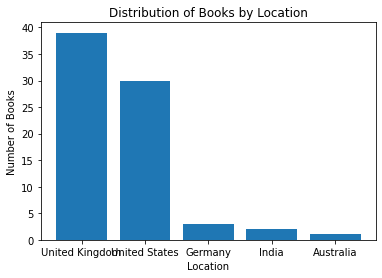

In [50]:
#number of books by location
Book_location = BIbooks['Item_location'].value_counts()


plt.bar(Book_location.index, Book_location.values)


plt.title('Distribution of Books by Location')
plt.xlabel('Location')
plt.ylabel('Number of Books')


plt.show()


# 

# 

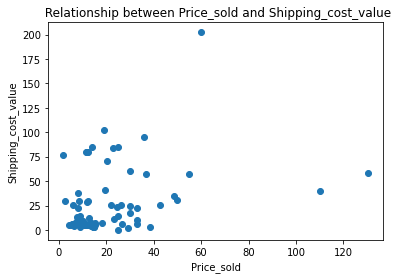

In [51]:
#Relationship between 'Price_sold' and 'Shipping_cost_value'

plt.scatter(x=BIbooks['Price_sold'], y=BIbooks['Shipping_cost_value'])

plt.title(' Relationship between Price_sold and Shipping_cost_value')
plt.xlabel('Price_sold')
plt.ylabel('Shipping_cost_value')


plt.show()


* The scattterplot also this indicates a weak positive correlation, which confirms that there is some tendency for books with higher prices to have higher shipping costs.

# 

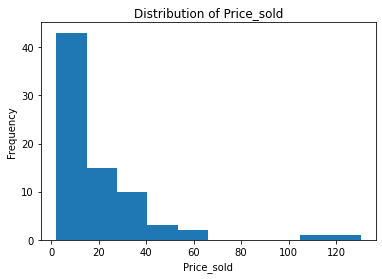

In [52]:
#distribution of Price_sold

plt.hist(BIbooks['Price_sold'], bins=10)

plt.title('Distribution of Price_sold')
plt.xlabel('Price_sold')
plt.ylabel('Frequency')
plt.show()

* Most BIbooks on EBAY are sold within the range of 2 Dollars  to 20 dollars

# 

In [53]:
#Count of shipping type
BIbooks['Shipping_type'].value_counts()

Paid shipping                  74
Free International shipping     1
Name: Shipping_type, dtype: int64

In [54]:
# total shipping cost of shipping type

BIbooks.groupby('Shipping_type')['Shipping_cost_value'].sum()

Shipping_type
Free International shipping       0.00
Paid shipping                  2060.41
Name: Shipping_cost_value, dtype: float64

In [55]:
# max shipping cost of shipping type

BIbooks.groupby('Shipping_type')['Shipping_cost_value'].max()

Shipping_type
Free International shipping      0.00
Paid shipping                  202.23
Name: Shipping_cost_value, dtype: float64

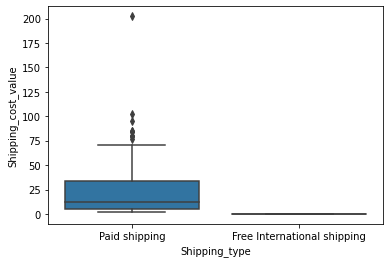

In [56]:
#relationship between Shipping_cost_value and Shipping_type 




sns.boxplot(x='Shipping_type', y='Shipping_cost_value', data=BIbooks)
plt.show()


# 

67 of the BI books has Paid shipping, which comes to a total cost of $1725.17, and the highest shipping cost for a book is 44.16 
   

# 

In [57]:
#find the top 10 Seller_name with the highest Seller_feedback

BIbooks.groupby('Seller_name')['Seller_feedback'].max().nlargest(10)

Seller_name
webuybooks             1740389
rarewaves-outlet        909494
cmedia_group            763774
wonderbooks             587952
thecotswoldlibrary      586859
awesomebooksusa         387183
goodwillrs              211859
book_fountain           166979
bluevasemarketplace     125322
bookmans_exchange       112385
Name: Seller_feedback, dtype: int32

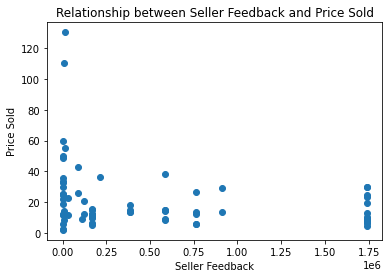

In [58]:
# Create a scatter plot
plt.scatter(BIbooks['Seller_feedback'], BIbooks['Price_sold'])

# Add chart labels
plt.title('Relationship between Seller Feedback and Price Sold')
plt.xlabel('Seller Feedback')
plt.ylabel('Price Sold')

# Display the chart
plt.show()


# 

In [59]:
# top 10 most expensive book by title
top_books = BIbooks.groupby('Title')['Price_sold'].max().nlargest(10)


table = PrettyTable()
table.field_names = ["Title", "Price Sold"]


for Title, price_sold in zip(top_books.index, top_books.values):
    table.add_row([Title, price_sold])


print(table)


+---------------------------------------------------------------------------------------------+------------+
|                                            Title                                            | Price Sold |
+---------------------------------------------------------------------------------------------+------------+
|       Business Education Course Entrepreneurs DVD/Textbooks Venture Academy Christian       |   130.28   |
|       Business Intelligence, Analytics, and Data Science: A Managerial Perspective 4th      |   110.0    |
|       Entrepreneurs Course DVD/Textbooks Venture Academy Christian Business Education       |   59.99    |
|        Business Intelligence : Practices, Technologies, and Management by Irma...TPB        |   54.99    |
|        Business Intelligence, Analytics Data Science A Managerial Perspective Sharda        |   49.99    |
|       2010 Business Intelligence: A Managerial Approach Book Efraim Turban 2nd Edition      |   48.73    |
|        Intelligen

# 

In [ ]:
# save the dataframe to csv
BIbooks.to_csv(r'C:\Users\O---u A\Downloads\WEB Scrapping\Ebay_BusinessIntelligenceBooks.csv', index=False)

# 